**Preprocesamiento de los índices de zombificación**

In [1]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns




In [2]:
#Lectura de csv obtenido de la hoja de cálculo original

ruta="../data/"
esZombi = pd.read_csv(ruta+"zombi.csv")

In [3]:
#Se comprueba que estan todos los registros

len(esZombi)

12266

In [4]:
#comprobación de valores nulos
esZombi.isna().sum()

ID                0
Zombi2010         0
Zombi2011         0
Zombi2012         0
Zombi2013         0
Zombi2014         0
Zombi2015         0
Zombi2016         0
Zombi2017         0
Zombi2018         0
Zombi2019         0
Zombi2020         0
Zombi2021         0
Zombi2022         0
Zombi2016-2018    0
Zombi2017-2019    0
Zombi2019-2021    0
Zombi2020-2022    0
dtype: int64

In [ ]:
#función para calcular columnas correspondientes al índice de zombificacion en períodos de tres años
def check_row(row, col1, col2, col3):
    if row[col1] == 1 and row[col2] == 1 and row[col3] == 1:
        return 1
    else:
        return 0

In [ ]:
#Se calcula la tasa de zombificación para algunos trienios para visulaizar posteriormente el grado de desalanceo del dataset
#No se guardarán los cambios pues el cálculo de  los índices zombis se realizará a la hora de implementar los modelos

orden=esZombi.columns.tolist().index("Zombi2017-2019")+1
esZombi.insert(orden, "Zombi2018-2020", esZombi.apply(lambda row: check_row(row,"Zombi2018","Zombi2019","Zombi2020"),axis=1))

esZombi["Zombi2016-2018"]=esZombi.apply(lambda row: check_row(row,"Zombi2016","Zombi2017","Zombi2018"),axis=1)
esZombi["Zombi2017-2019"]=esZombi.apply(lambda row: check_row(row,"Zombi2017","Zombi2018","Zombi2019"),axis=1)

esZombi["Zombi2019-2021"]=esZombi.apply(lambda row: check_row(row,"Zombi2019","Zombi2020","Zombi2021"),axis=1)
esZombi["Zombi2020-2022"]=esZombi.apply(lambda row: check_row(row,"Zombi2020","Zombi2021","Zombi2022"),axis=1)

In [ ]:
#para comprobar el grado de desbalanceo del dataset con respecto a la clase positiva, se comrpueba para el petiado 2020-2022 ccuantas empresas zombi hay (un 1.8% del total)

(esZombi["Zombi2020-2022"]==1).sum()/len(esZombi)

0.018017283548018913

In [ ]:
#esZombi.to_csv(ruta+"zombiProcesado.csv", index=False)

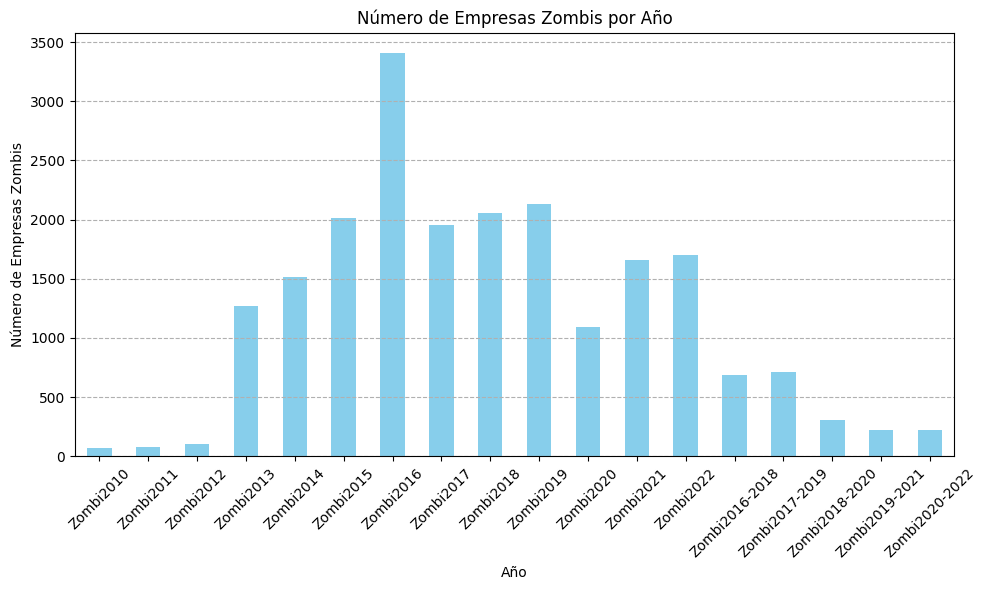

In [ ]:
# A continuación se visualiza el porcentaje de zombis por año y por los trienios calculados
# Se observa que la tasa de positivos es mucho mas reducida cuando consideramos, de acuerdo a la definición de zombi, un periodo de 3 eños

esZombiAños = esZombi.filter(like='Zombi20')

# Sumar los valores de cada columna para obtener el total de empresas zombi por año
zombi_counts = esZombiAños.sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
zombi_counts.plot(kind='bar', color='skyblue')
plt.title('Número de Empresas Zombis por Año')
plt.xlabel('Año')
plt.ylabel('Número de Empresas Zombis')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

# Mostrar el gráfico
plt.tight_layout()
plt.show()